# Assignment 2: Helping the Tanzanian Ministry of Water provide water to their people

#### By: Sara Krumpak, Jessica Matta, Ryan Chiu, and Carolin Kroeger
#### Team name: Pump it up MBD
##### Final score: 0.8201

Tanzania is facing a central problem regarding the low access to water. Water is crucial to the development of a country, primarily as a critical requirement for our survival, and additionally in agriculture and industrial development. Even though Tanzania is surrounded by numerous water sources of different types, the millions living below poverty cannot access it at easy, often spending hours walking in order to reach the closes functional water pump. Thus, the task is to predict which water pumps are going to continue working, which are going to need repairs and which are going to fail. 

#### Problem description and data download: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

### Import Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [113]:
train_set = pd.read_csv(
    "/Users/carolinkroeger/Desktop/Train.csv"
)
test_set = pd.read_csv(
    "/Users/carolinkroeger/Desktop/Test.csv"
)
train_labels = pd.read_csv(
    "/Users/carolinkroeger/Desktop/Train_Labels.csv",
    index_col="id",
)

### Check datasets

In [114]:
train_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [115]:
test_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [116]:
train_labels.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


### Combine the datasets

In [117]:
dataset = pd.concat([train_set, test_set], sort=False)

### Check datset

In [118]:
dataset.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


#### Here we can see how many functional pumps there are, how many non-functional, and how many need repairs.

/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


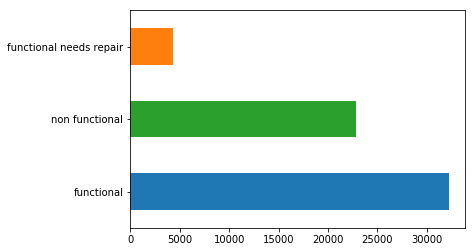

In [119]:
palette=[sns.color_palette()[0],sns.color_palette()[2],sns.color_palette()[1]]
train_labels.status_group.value_counts().plot(kind='barh', colors=palette)

## First we will drop all the variable we believe add no value to the dataset

#### If we look at the number of unique values in wpt_name, we can see that there are 45,684 different ones. As there are many different values, we will drop this column.

In [120]:
dataset.drop(columns=["id"], inplace=True)

In [121]:
dataset["wpt_name"].value_counts()

none                      4440
Shuleni                   2183
Zahanati                  1034
Msikitini                  647
Kanisani                   390
Sokoni                     328
Bombani                    323
Ofisini                    321
School                     260
Shule Ya Msingi            247
Shule                      191
Sekondari                  178
Muungano                   159
Mkombozi                   145
Upendo                     130
Madukani                   128
Mbugani                    113
Kituo Cha Afya             113
Umoja                      105
Mkuyuni                    103
Hospital                   100
Center                     100
Kisimani                    97
Ccm                         95
Mtakuja                     91
Songambele                  90
Ofisi Ya Kijiji             89
Bwawani                     86
Tankini                     82
Bondeni                     80
                          ... 
Kwa Leisili                  1
Mbigili 

In [122]:
len(dataset["wpt_name"].unique())

45684

In [123]:
dataset.drop(columns=["wpt_name"], inplace=True)

#### We will drop num_private because it provides no significant information. There are a lot of 0's and we do not get information about what this variable means to begin with. 

In [124]:
dataset["num_private"].value_counts()

0       73299
1          94
6          92
5          60
8          58
15         47
32         45
45         41
3          38
93         37
39         34
2          31
7          31
4          30
102        28
47         27
65         27
17         24
11         18
80         17
20         14
25         14
34         13
16         13
41         12
22         11
120         9
12          7
50          7
150         6
        ...  
180         3
23          2
27          2
141         2
280         1
131         1
240         1
1776        1
755         1
450         1
55          1
136         1
698         1
1402        1
60          1
111         1
420         1
300         1
42          1
87          1
35          1
13          1
672         1
160         1
94          1
30          1
669         1
668         1
213         1
62          1
Name: num_private, Length: 68, dtype: int64

In [125]:
len(dataset["num_private"].unique())

68

In [126]:
dataset.drop(columns=["num_private"], inplace=True)

#### We will drop subvillage as we have other variables with location names.  Subvillage also has some variable called "M" or "1" which do not make sense.  Additionally, there are too many unique subvillage names.

In [127]:
dataset["subvillage"].value_counts()

Shuleni          646
Majengo          631
Madukani         629
Kati             467
Mtakuja          322
Sokoni           294
M                243
Muungano         215
Mbuyuni          210
Songambele       194
Mlimani          190
Miembeni         168
Msikitini        164
1                157
Kanisani         146
Kibaoni          143
Mjini            131
Mjimwema         129
Mapinduzi        126
Mkwajuni         125
Mwenge           125
I                124
Bondeni          121
Azimio           116
Amani            115
Mabatini         114
Mbugani          113
Senta            111
Kichangani       110
Mission          110
                ... 
Makigi Kati        1
Kazigunga B        1
Mwakitambala       1
Mwanabwito         1
Igalamo            1
Mlesi              1
Gibasisi           1
Vikindu            1
San`Gana           1
Rugashi            1
Mchombo            1
Kodimo             1
Bahini             1
Kenyaitanka        1
Nyarusonzo         1
Himbo              1
Gwintuku     

In [128]:
len(dataset["subvillage"].unique())

21426

In [129]:
dataset.drop(columns=["subvillage"], inplace=True)

#### We will be dropping region code as it does not mach the corresponding region variable and the numbers provide no value. 

In [130]:
dataset["region_code"].value_counts()

11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
4     3145
1     2779
13    2536
14    2488
20    2451
15    2242
6     2032
21    1972
80    1536
60    1298
90    1133
7     1020
99     512
9      499
24     402
8      375
40       1
Name: region_code, dtype: int64

In [131]:
len(dataset["region_code"].unique())

27

In [132]:
dataset.drop(columns=["region_code"], inplace=True)

#### We will be dropping district code as it does not provide additional value. The numbers carry no significance. 

In [133]:
dataset["district_code"].value_counts()

1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64

In [134]:
len(dataset["district_code"].unique())

20

In [135]:
dataset.drop(columns=["district_code"], inplace=True)

#### We will be dropping the LGA variable as it adds no additional value, and we have other location attributes like longitude and latitude that we will keep. 

In [136]:
dataset["lga"].value_counts()

Njombe              3128
Moshi Rural         1566
Arusha Rural        1521
Bariadi             1485
Rungwe              1381
Kilosa              1368
Kasulu              1322
Mbozi               1286
Bagamoyo            1263
Meru                1244
Kilombero           1207
Singida Rural       1202
Same                1106
Kibondo             1101
Kyela               1070
Kahama              1058
Magu                1049
Maswa               1024
Kigoma Rural        1015
Karagwe              967
Mbinga               943
Iringa Rural         914
Serengeti            905
Songea Rural         876
Lushoto              870
Ngara                854
Mpanda               852
Mvomero              846
Namtumbo             845
Ulanga               841
                    ... 
Bahi                 279
Newala               271
Rorya                269
Kisarawe             269
Temeke               266
Tarime               264
Kiteto               253
Ngorongoro           245
Shinyanga Urban      235


In [137]:
len(dataset["lga"].unique())

125

In [138]:
dataset.drop(columns=["lga"], inplace=True)

#### We will be deleting the ward variable as it provides no additonal value, and we have other location attributes like longitude and latitude that we will keep. 

In [139]:
dataset["ward"].value_counts()

Igosi              386
Imalinyi           318
Siha Kati          297
Mdandu             292
Nduruma            261
Kitunda            260
Mishamo            251
Msindo             243
Chalinze           238
Maji ya Chai       227
Usuka              222
Chanika            221
Ngarenanyuki       212
Vikindu            199
Mtwango            189
Zinga/Ikerege      185
Itete              179
Matola             177
Magomeni           170
Maramba            167
Mvomero            164
Wanging'ombe       164
Ifakara            164
Olkokola           163
Kikatiti           162
Nkoma              161
Maposeni           159
Mahongole          153
Nkungulu           153
Igongolo           151
                  ... 
Kapalala             2
Kiyowela             2
Kwasunga             2
Kitete               2
Igogo                2
Ifinga               2
Burungura            2
Nkome                2
Bukumi               2
Chinugulu            1
Mdabulo              1
Ukata                1
Kirongo    

In [140]:
len(dataset["ward"].unique())

2098

In [141]:
dataset.drop(columns=["ward"], inplace=True)

#### We will drop the variable recorded_by as it is all the same one value. 

In [142]:
dataset["recorded_by"].value_counts()

GeoData Consultants Ltd    74250
Name: recorded_by, dtype: int64

In [143]:
dataset.drop(columns=["recorded_by"], inplace=True)

#### We will drop scheme_name as there are 2869 unique values, which is too much to provide additional information. 

In [144]:
dataset["scheme_name"].value_counts()

K                                               858
None                                            794
Borehole                                        704
Chalinze wate                                   501
M                                               490
DANIDA                                          483
Government                                      395
Ngana water supplied scheme                     335
wanging'ombe water supply s                     323
Bagamoyo wate                                   296
wanging'ombe supply scheme                      284
I                                               281
Uroki-Bomang'ombe water sup                     266
N                                               258
Kirua kahe gravity water supply trust           237
Machumba estate pipe line                       225
Makwale water supplied sche                     209
Kijiji                                          205
Handeni Trunk Main(H                            204
S           

In [145]:
len(dataset["scheme_name"].unique())  #2869 distinct values

2869

In [146]:
dataset.drop(columns=["scheme_name"], inplace=True)

#### We will drop extration type group and extraction type class as they are very similar to extraction type. As extraction type has more informaiton we will drop the other two. 

In [147]:
dataset["extraction_type_group"].value_counts()

gravity            33263
nira/tanira        10205
other               8102
submersible         7772
swn 80              4588
mono                3628
india mark ii       3029
afridev             2208
rope pump            572
other handpump       447
wind-powered         152
other motorpump      149
india mark iii       135
Name: extraction_type_group, dtype: int64

In [148]:
len(dataset["extraction_type_group"].unique())

13

In [149]:
dataset["extraction_type_class"].value_counts()

gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

In [150]:
len(dataset["extraction_type_class"].unique())

7

In [151]:
dataset["extraction_type"].value_counts()

gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [152]:
len(dataset["extraction_type"].unique())

18

In [153]:
dataset.drop(columns=["extraction_type_group"], inplace=True)
dataset.drop(columns=["extraction_type_class"], inplace=True)

#### Similarly to extraction, we will drop management group and keep management as they are very similar, however, management has more details and information.

In [154]:
dataset["management"].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [155]:
len(dataset["management"].unique())  

12

In [156]:
dataset["management_group"].value_counts()

user-group    65538
commercial     4591
parastatal     2229
other          1209
unknown         683
Name: management_group, dtype: int64

In [157]:
len(dataset["management_group"].unique())  

5

In [158]:
dataset.drop(columns=["management_group"], inplace=True)

#### We will be dropping payment and keeping payment type as they are the same variable but with different wordings.

In [159]:
dataset["payment"].value_counts()

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [160]:
len(dataset["payment"].unique())

7

In [161]:
dataset["payment_type"].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

In [162]:
len(dataset["payment_type"].unique()) 

7

In [163]:
dataset.drop(columns=["payment"], inplace=True)

#### Water quality and quality group are once again very similar, therefore, we will be dropping quality group as water quality some additional detail that might be important.

In [164]:
dataset["quality_group"].value_counts()

good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

In [165]:
len(dataset["quality_group"].unique()) 

6

In [166]:
dataset["water_quality"].value_counts()

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [167]:
len(dataset["water_quality"].unique()) 

8

In [168]:
dataset.drop(columns=["quality_group"], inplace=True)

#### We will drop quantity group as is it identical to the quantity variable

In [169]:
dataset["quantity"].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

In [170]:
dataset["quantity_group"].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity_group, dtype: int64

In [171]:
dataset.drop(columns=["quantity_group"], inplace=True)

#### Similaraly to before, source class, source type, and source are all very similar. Therefore, we will be keeping source and dropping source class and source type. 

In [172]:
dataset["source_class"].value_counts()

groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

In [173]:
len(dataset["source_class"].unique())

3

In [174]:
dataset["source_type"].value_counts()

spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

In [175]:
len(dataset["source_type"].unique())

7

In [176]:
dataset["source"].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [177]:
len(dataset["source"].unique())

10

In [178]:
dataset.drop(columns=["source_class"], inplace=True)
dataset.drop(columns=["source_type"], inplace=True)

#### We will be dropping water point type group and keeping water point type as they are very similar.

In [179]:
dataset["waterpoint_type"].value_counts()

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64

In [180]:
len(dataset["waterpoint_type"].unique()) 

7

In [181]:
dataset["waterpoint_type_group"].value_counts()

communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64

In [182]:
len(dataset["waterpoint_type_group"].unique())

6

In [183]:
dataset.drop(columns=["waterpoint_type_group"], inplace=True)

## Next we will be imputing variables that have NA's, 0, None, or Other.

#### We will check what variable have NA's in order to deal with them.

In [184]:
dataset.isnull().sum()

amount_tsh              0
date_recorded           0
funder               4504
gps_height              0
installer            4532
longitude               0
latitude                0
basin                   0
region                  0
population              0
public_meeting       4155
scheme_management    4846
permit               3793
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
dtype: int64

#### We will also check how many variables have zeros and which ones we need to deal with.

In [185]:
(dataset == 0).sum()

amount_tsh           52049
date_recorded            0
funder                   0
gps_height           25649
installer                0
longitude             2269
latitude                 0
basin                    0
region                   0
population           26834
public_meeting        6346
scheme_management        0
permit               21851
construction_year    25969
extraction_type          0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
dtype: int64

#### From all the variables that have 0's, we will have to do something about the ones in constriction year. The 0's in gps_height and and longitude make sense as the pumps can be located at sea level.  The 0's in public_meeting and permit represent the "false" boolean values.

#### Funder: We will fill in nulls with "other"

In [186]:
dataset["funder"].fillna(value="Other", inplace=True)

In [187]:
type("funder")

str

#### We will also change the values with count less than 100 to other in order to decrease the number of unique values.

In [188]:
funder_count = dataset["funder"].value_counts()
replace_funder = funder_count[funder_count <= 100].index
dataset["funder"].replace(replace_funder, "Other", inplace=True)

In [189]:
funder_count = dataset["funder"].value_counts()
funder_count

Other                            18976
Government Of Tanzania           11299
Danida                            3907
Hesawa                            2782
Rwssp                             1703
World Bank                        1701
Kkkt                              1623
World Vision                      1562
Unicef                            1324
Tasaf                             1136
Dhv                               1065
District Council                  1037
Private Individual                1034
Dwsp                              1012
0                                  980
Norad                              949
Germany Republi                    765
Water                              739
Tcrs                               735
Ministry Of Water                  728
Dwe                                605
Netherlands                        592
Hifab                              577
Adb                                551
Lga                                546
Amref                    

In [190]:
replace_zeros = dataset["funder"].loc[dataset["funder"] == "0"]
replace_zeros 
dataset["funder"].replace(replace_zeros, "Other", inplace=True)

In [191]:
funder_count = dataset["funder"].value_counts()
funder_count

Other                            19956
Government Of Tanzania           11299
Danida                            3907
Hesawa                            2782
Rwssp                             1703
World Bank                        1701
Kkkt                              1623
World Vision                      1562
Unicef                            1324
Tasaf                             1136
Dhv                               1065
District Council                  1037
Private Individual                1034
Dwsp                              1012
Norad                              949
Germany Republi                    765
Water                              739
Tcrs                               735
Ministry Of Water                  728
Dwe                                605
Netherlands                        592
Hifab                              577
Adb                                551
Lga                                546
Amref                              525
Fini Water               

#### Installer: We will change the NA's and 0 to Unknown

In [192]:
dataset["installer"].fillna(value="Unknown", inplace=True)
dataset["installer"].replace("0", "Unknown", inplace=True)

#### We will also change the values with count less than 100 to other in order to decrease the number of unique values.

In [193]:
installer_count = dataset["installer"].value_counts()
replace_installer = installer_count[installer_count <= 100].index
dataset["installer"].replace(replace_installer, "Other", inplace=True)

#### Public Meeting: We will put "None" for the NA's as we do not have information on whether the public meeting took place or not. 

In [194]:
dataset["public_meeting"].fillna(value=dataset["public_meeting"].mode()[0], inplace = True)

#### Permit: We will fill in the NA's with the "None" as we do not know whether these pumps have a permit or not.

In [195]:
dataset["permit"].fillna(value=dataset["permit"].mode()[0], inplace = True)

#### We will be leaving the scheme management attriute because who operates the water point could be significant as it can indicate who can take better care of it. 

In [196]:
dataset["scheme_management"].fillna(value="Unknown", inplace=True)
dataset["scheme_management"].replace("None","Unknown", inplace=True)

#### For the 0's in the contruction year we will compute the mean year, without taking into account the 0's.

In [197]:
dataset["construction_year"].value_counts()

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [198]:
dataset["construction_year"].replace(0, np.nan, inplace=True)

In [199]:
dataset["construction_year"].value_counts()

2010.0    3314
2008.0    3243
2009.0    3196
2000.0    2578
2007.0    1960
2006.0    1892
2011.0    1591
2003.0    1579
2004.0    1417
2012.0    1347
2002.0    1343
1995.0    1283
2005.0    1275
1978.0    1267
1999.0    1222
1998.0    1190
1985.0    1177
1990.0    1176
1996.0    1020
1980.0    1005
1984.0     970
1994.0     940
1982.0     926
1972.0     892
1997.0     821
1974.0     814
1992.0     807
1993.0     745
2001.0     680
1988.0     657
1983.0     594
1975.0     561
1986.0     553
1976.0     525
1970.0     493
1991.0     407
1989.0     396
1987.0     370
1981.0     291
1977.0     247
1979.0     245
1973.0     227
2013.0     209
1971.0     177
1960.0     124
1963.0     107
1967.0     106
1968.0      93
1969.0      77
1964.0      48
1962.0      36
1961.0      28
1965.0      21
1966.0      19
Name: construction_year, dtype: int64

#### We tested out mean but mean gave a better score. 

In [200]:
dataset["construction_year"].fillna(value=dataset["construction_year"].mean(), inplace=True)

In [201]:
dataset["construction_year"].value_counts()

1996.870943    25969
2010.000000     3314
2008.000000     3243
2009.000000     3196
2000.000000     2578
2007.000000     1960
2006.000000     1892
2011.000000     1591
2003.000000     1579
2004.000000     1417
2012.000000     1347
2002.000000     1343
1995.000000     1283
2005.000000     1275
1978.000000     1267
1999.000000     1222
1998.000000     1190
1985.000000     1177
1990.000000     1176
1996.000000     1020
1980.000000     1005
1984.000000      970
1994.000000      940
1982.000000      926
1972.000000      892
1997.000000      821
1974.000000      814
1992.000000      807
1993.000000      745
2001.000000      680
1988.000000      657
1983.000000      594
1975.000000      561
1986.000000      553
1976.000000      525
1970.000000      493
1991.000000      407
1989.000000      396
1987.000000      370
1981.000000      291
1977.000000      247
1979.000000      245
1973.000000      227
2013.000000      209
1971.000000      177
1960.000000      124
1963.000000      107
1967.000000  

#### Population: we will check the skewness as there are some very large numbers and some very small ones. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a20123ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a20123fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a201237b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a22b28908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22b28c50>],
 'means': []}

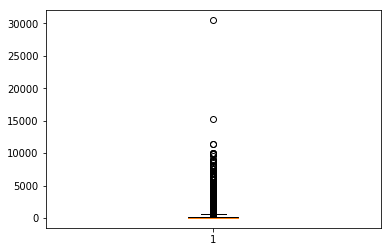

In [202]:
plt.boxplot(dataset["population"])

#### As the population variable is very skewed we will take out the outliers

In [203]:
dataset["population"].clip(upper=12000, inplace=True)

## Next we will be Feature Engineering

#### We firstly split date_recorded into year, month and day respectively and finally drop the original column, keeping only the year and month. This will capture any possible trend there may be over the years or during a year in general. 

In [204]:
from datetime import datetime

In [205]:
dataset["month_recorded"] = (dataset["date_recorded"].apply(lambda x: (datetime.strptime(x, "%Y-%m-%d").month))).apply(str)
dataset["month_recorded"].head()

0    3
1    3
2    2
3    1
4    7
Name: month_recorded, dtype: object

In [206]:
dataset["year_recorded"] = (dataset["date_recorded"].apply(lambda x: (datetime.strptime(x, "%Y-%m-%d").year))).apply(str)
dataset["year_recorded"].head()

0    2011
1    2013
2    2013
3    2013
4    2011
Name: year_recorded, dtype: object

#### We will be deleting the date recoded variable as we seperated it into a month and year column and now is repetitive. 

In [207]:
dataset.drop(columns=["date_recorded"], inplace=True)

#### Here we check if the funder and the installer are one and the same in the creation of the respective pump. We are looking to capture any trend there may be if they are the same or not.

In [208]:
dataset['funder_installer_equal'] = (dataset['funder']==dataset['installer']).astype(int)
dataset.funder_installer_equal.head()

0    1
1    1
2    0
3    0
4    0
Name: funder_installer_equal, dtype: int64

#### In order to check for the amount of years the pump has existed, we create a variable that subtracts the construction_year by the current year 2019.

In [209]:
dataset["well_existence"] = 2019 - dataset["construction_year"]
dataset["well_existence"].head()

0    20.000000
1     9.000000
2    10.000000
3    33.000000
4    22.129057
Name: well_existence, dtype: float64

## Seperate train and test and add the labels

In [210]:
dataset = pd.get_dummies(dataset)

In [211]:
train_clean = dataset[0:59400]

In [212]:
train_clean.head()

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,funder_installer_equal,well_existence,...,month_recorded_6,month_recorded_7,month_recorded_8,month_recorded_9,year_recorded_2001,year_recorded_2002,year_recorded_2004,year_recorded_2011,year_recorded_2012,year_recorded_2013
0,6000.0,1390,34.938093,-9.856322,109,True,False,1999.000000,1,20.000000,...,0,0,0,0,0,0,0,1,0,0
1,0.0,1399,34.698766,-2.147466,280,True,True,2010.000000,1,9.000000,...,0,0,0,0,0,0,0,0,0,1
2,25.0,686,37.460664,-3.821329,250,True,True,2009.000000,0,10.000000,...,0,0,0,0,0,0,0,0,0,1
3,0.0,263,38.486161,-11.155298,58,True,True,1986.000000,0,33.000000,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0,31.130847,-1.825359,0,True,True,1996.870943,0,22.129057,...,0,1,0,0,0,0,0,1,0,0


In [213]:
#train_both = pd.concat([train_clean, train_labels], sort = False)

In [214]:
#train_both.head()

In [215]:
test_clean = dataset[59400::]

In [216]:
test_clean.head()

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,funder_installer_equal,well_existence,...,month_recorded_6,month_recorded_7,month_recorded_8,month_recorded_9,year_recorded_2001,year_recorded_2002,year_recorded_2004,year_recorded_2011,year_recorded_2012,year_recorded_2013
0,0.0,1996,35.290799,-4.059696,321,True,True,2012.0,0,7.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,1569,36.656709,-3.309214,300,True,True,2000.0,0,19.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1567,34.767863,-5.004344,500,True,True,2010.0,0,9.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,267,38.058046,-9.418672,250,True,True,1987.0,1,32.0,...,0,0,0,0,0,0,0,0,0,1
4,500.0,1260,35.006123,-10.950412,60,True,True,2000.0,1,19.0,...,0,0,0,0,0,0,0,0,0,1


## Machine Learning Models

### Linear Regression Model

In [217]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [218]:
logreg = LogisticRegression()

logreg.fit(train_clean, train_labels)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [219]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(), param_grid)

In [220]:
gridsearch = GridSearchCV(
    cv=5,
    estimator=LogisticRegression(
        C=1.0,
        intercept_scaling=1,
        dual=False,
        fit_intercept=True,
        tol=0.0001,
    ),
    param_grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
)

In [221]:
regression = gridsearch.fit(train_clean, train_labels)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-pac

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-pac

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

In [222]:
optimized_regression = LogisticRegression(C=regression.best_estimator_.get_params()['C'])
optimized_regression.fit(train_clean, train_labels)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [223]:
predictions = optimized_regression.predict(test_clean)

In [224]:
print(optimized_regression)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


#### After making a submission when running a linear regressionmodel, or score was 0.726, which was not our best score. Therefore, we will not be using linear regression as our final model. 

### Gradient Booster Model

In [225]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [226]:
idtest = test_set["id"]

In [227]:
baseline = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1,
    max_features="sqrt",
    random_state=10,
)

In [228]:
baseline.fit(train_clean, train_labels)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [229]:
predictors = list(train_clean)

In [230]:
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(
    ascending=False
)

In [231]:
preds = baseline.predict(test_clean)

#### After running this model we got a score of 0.7056 which is not the best score, therefore, we will not be using this model 

### Random Forest Model

In [232]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [233]:
RFCparams = {
    "n_estimators": [600, 700, 900],
    "max_depth": [30, 31, 32], 
}

In [234]:
mod = RandomForestClassifier()

In [235]:
RFCmod = GridSearchCV(mod, RFCparams, cv=3, n_jobs=-1)

In [236]:
RFCmod.fit(train_clean, train_labels)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [600, 700, 900], 'max_depth': [30, 31, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [237]:
RFCmod.best_params_

{'max_depth': 30, 'n_estimators': 600}

In [238]:
preds = RFCmod.predict(test_clean)

In [239]:
idtest = test_set["id"]

In [240]:
submission = pd.DataFrame(data=preds, index=idtest, columns=["status_group"])

In [241]:
submission.head()

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional


#### Write the submission file

In [242]:
#submission.to_csv("submission_final.csv")  

#### After running the different models, the best score we got was from random forest, which was 0.8201